In [65]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint
import plotly.graph_objects as go
import scipy.stats as sts

from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2018)

In [66]:
#Import census data into data frame. This includes population data and poverty data by race
census_data = c.acs5.get(("NAME", "B01003_001E", "B02001_002E","B02001_003E",
                          "B02001_004E",
                          "B02001_005E",
                          "B02001_006E",
                          "B02001_008E",
                          "B03001_003E",
                          "B17001_002E",
                          "B17001A_002E",
                          "B17001B_002E",
                          "B17001C_002E",
                          "B17001D_002E",
                          "B17001E_002E",
                          "B17001G_002E",
                          "B17001I_002E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B02001_002E": "Population White",
                                      "B02001_003E": "Population Black",
                                      "B02001_004E": "Population American Indian",
                                      "B02001_005E": "Population Asian",
                                      "B02001_006E": "Population Native Hawaiian",
                                      "B02001_008E": "Population 2 or More Races",
                                      "B03001_003E": "Population Hispanic",
                                      "B17001_002E": "Poverty",
                                      "B17001A_002E": "White Poverty",
                                      "B17001B_002E": "Black Poverty",
                                      "B17001C_002E": "American Indian Poverty",
                                      "B17001D_002E": "Asian Poverty",
                                      "B17001E_002E": "Native Hawaiian Poverty",
                                      "B17001G_002E": "2 or More Races Poverty",
                                      "B17001I_002E": "Hispanic Poverty",
                                      "NAME": "Name", "state": "State"})
pd.set_option('display.max_columns', 999)
census_pd.head()

,Name,Population,Population White,Population Black,Population American Indian,Population Asian,Population Native Hawaiian,Population 2 or More Races,Population Hispanic,Poverty,White Poverty,Black Poverty,American Indian Poverty,Asian Poverty,Native Hawaiian Poverty,2 or More Races Poverty,Hispanic Poverty,State
0,Minnesota,5527358.0,4606044.0,342186.0,58982.0,262359.0,2187.0,157767.0,292764.0,547442.0,345061.0,100381.0,17260.0,37275.0,393.0,26079.0,56976.0,27
1,Mississippi,2988762.0,1751193.0,1125834.0,13689.0,28313.0,707.0,40193.0,90493.0,599795.0,220845.0,353470.0,4136.0,3748.0,157.0,10311.0,21702.0,28
2,Missouri,6090062.0,5008342.0,704896.0,26952.0,116720.0,6662.0,155328.0,249105.0,837930.0,586815.0,175186.0,5218.0,16626.0,2014.0,32186.0,56254.0,29
3,Montana,1041732.0,925642.0,4630.0,67289.0,7947.0,757.0,29435.0,39019.0,139063.0,108702.0,889.0,21945.0,1360.0,58.0,5290.0,7205.0,30
4,Nebraska,1904760.0,1666463.0,90860.0,17282.0,44105.0,1392.0,48600.0,203281.0,213790.0,160801.0,23326.0,5117.0,7718.0,285.0,9191.0,42749.0,31


In [67]:
#population percentage for race and ethnicity in each state
census_pd['%Pop Black'] = census_pd['Population Black']/census_pd['Population']*100
census_pd['%Pop White'] = census_pd['Population White']/census_pd['Population']*100
census_pd['%Pop American Indian'] = census_pd['Population American Indian']/census_pd['Population']*100
census_pd['%Pop Asian'] = census_pd['Population Asian']/census_pd['Population']*100
census_pd['%Pop Native Hawaiian'] = census_pd['Population Native Hawaiian']/census_pd['Population']*100
census_pd['%Pop 2 or More Races'] = census_pd['Population 2 or More Races']/census_pd['Population']*100
census_pd['%Pop Hispanic'] = census_pd['Population Hispanic']/census_pd['Population']*100

#calculate poverty rate for race and ethnicity
census_pd["Poverty Rate"] = 100 * census_pd["Poverty"].astype(int) / census_pd["Population"].astype(int)
census_pd["Poverty Rate White"] = 100 * census_pd["White Poverty"].astype(int) / census_pd["Population White"].astype(int)
census_pd["Poverty Rate Black"] = 100 * census_pd["Black Poverty"].astype(int) / census_pd["Population Black"].astype(int)
census_pd["Poverty Rate American Indian"] = 100 * census_pd["American Indian Poverty"].astype(int) / census_pd["Population American Indian"].astype(int)
census_pd["Poverty Rate Asian"] = 100 * census_pd["Asian Poverty"].astype(int) / census_pd["Population Asian"].astype(int)
census_pd["Poverty Rate Hispanic"] = 100 * census_pd["Hispanic Poverty"].astype(int) / census_pd["Population Hispanic"].astype(int)
census_pd["Poverty Rate Native Hawaiian"] = 100 * census_pd["Native Hawaiian Poverty"].astype(int) / census_pd["Population Native Hawaiian"].astype(int)
census_pd["Poverty Rate 2 or More Races"] = 100 * census_pd["2 or More Races Poverty"].astype(int) / census_pd["Population 2 or More Races"].astype(int)

# state_abrevs=[]
# for place in census_pd['Name']:
#     states =us.states.lookup(place)
#     code = states.abbr
#     state_abrevs.append(code)
census_pd.head()



,Name,Population,Population White,Population Black,Population American Indian,Population Asian,Population Native Hawaiian,Population 2 or More Races,Population Hispanic,Poverty,White Poverty,Black Poverty,American Indian Poverty,Asian Poverty,Native Hawaiian Poverty,2 or More Races Poverty,Hispanic Poverty,State,%Pop Black,%Pop White,%Pop American Indian,%Pop Asian,%Pop Native Hawaiian,%Pop 2 or More Races,%Pop Hispanic,Poverty Rate,Poverty Rate White,Poverty Rate Black,Poverty Rate American Indian,Poverty Rate Asian,Poverty Rate Hispanic,Poverty Rate Native Hawaiian,Poverty Rate 2 or More Races
0,Minnesota,5527358.0,4606044.0,342186.0,58982.0,262359.0,2187.0,157767.0,292764.0,547442.0,345061.0,100381.0,17260.0,37275.0,393.0,26079.0,56976.0,27,6.190770,83.331747,1.067092,4.746553,0.039567,2.854293,5.296635,9.904225,7.491483,29.335215,29.263165,14.207632,19.461409,17.969822,16.530073
1,Mississippi,2988762.0,1751193.0,1125834.0,13689.0,28313.0,707.0,40193.0,90493.0,599795.0,220845.0,353470.0,4136.0,3748.0,157.0,10311.0,21702.0,28,37.668908,58.592588,0.458016,0.947315,0.023655,1.344804,3.027775,20.068343,12.611117,31.396280,30.214040,13.237735,23.981965,22.206506,25.653721
2,Missouri,6090062.0,5008342.0,704896.0,26952.0,116720.0,6662.0,155328.0,249105.0,837930.0,586815.0,175186.0,5218.0,16626.0,2014.0,32186.0,56254.0,29,11.574529,82.237948,0.442557,1.916565,0.109391,2.550516,4.090352,13.758973,11.716752,24.852744,19.360344,14.244345,22.582445,30.231162,20.721312
3,Montana,1041732.0,925642.0,4630.0,67289.0,7947.0,757.0,29435.0,39019.0,139063.0,108702.0,889.0,21945.0,1360.0,58.0,5290.0,7205.0,30,0.444452,88.856059,6.459339,0.762864,0.072667,2.825583,3.745589,13.349211,11.743417,19.200864,32.613057,17.113376,18.465363,7.661823,17.971802
4,Nebraska,1904760.0,1666463.0,90860.0,17282.0,44105.0,1392.0,48600.0,203281.0,213790.0,160801.0,23326.0,5117.0,7718.0,285.0,9191.0,42749.0,31,4.770155,87.489395,0.907306,2.315515,0.073080,2.551503,10.672263,11.223986,9.649239,25.672463,29.608842,17.499150,21.029511,20.474138,18.911523


In [68]:
#read in csv of race data into a data frame
race_df = pd.read_csv('Resources/RaceDataEntryCRDT.csv')
race_current_df = race_df.drop(race_df.index[56:])
race_current_df['Name'] = [
    'Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 
    'California', 'Colorado', 'Connecticut', 'District of Columbia',
    'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 
    'Illinois', 'Indiana', 'Kansas', 'Kentucky','Louisiana', 'Massachusetts', 
    'Maryland', 'Maine', 'Michigan','Minnesota', 'Missouri', 
    'Northern Mariana Islands', 'Mississippi', 'Montana', 'North Carolina', 
    'North Dakota','Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 
    'Nevada', 'New York','Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
    'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont',
    'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'
    ]
race_current_df.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,Cases_Ethnicity_NonHispanic,Cases_Ethnicity_Unknown,Deaths_Total,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown,Name
0,20200729,AK,2797,852,81.0,NaN,83.0,366.0,103.0,68.0,48.0,1196.0,150.0,1215.0,1432.0,22.0,11.0,0.0,NaN,2.0,8.0,1.0,0.0,0.0,0.0,0.0,22.0,0.0,Alaska
1,20200729,AL,83782,25915,23239.0,NaN,309.0,NaN,NaN,NaN,4527.0,29789.0,5832.0,40720.0,37228.0,1538.0,779.0,623.0,NaN,4.0,NaN,NaN,NaN,29.0,103.0,48.0,1267.0,223.0,Alabama
2,20200729,AR,40968,20527,8673.0,NaN,587.0,120.0,2103.0,NaN,5456.0,3502.0,9493.0,31475.0,0.0,434.0,255.0,113.0,NaN,6.0,2.0,31.0,NaN,30.0,0.0,43.0,394.0,0.0,Arkansas
3,20200729,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa
4,20200729,AZ,168273,29227,3822.0,38887.0,1309.0,9631.0,NaN,NaN,3978.0,81419.0,38887.0,47967.0,81419.0,3454.0,1372.0,104.0,946.0,42.0,430.0,NaN,NaN,57.0,503.0,946.0,2005.0,503.0,Arizona


In [75]:
#merge census data and covid data
merge_df = pd.merge(census_pd, race_current_df, how='left', on='Name')

merge_df = merge_df.fillna(0)

#covid infections by % race

merge_df['%COVID'] = merge_df['Cases_Total'].astype(int) /merge_df['Population'].astype(int)*100
merge_df['%COVID_White'] = merge_df['Cases_White'].astype(int) /merge_df['Population White'].astype(int)*100
merge_df['%COVID_Black'] = merge_df['Cases_Black'].astype(int) /merge_df['Population Black'].astype(int)*100
merge_df['%COVID_LatinX'] = merge_df['Cases_LatinX'].astype(int) /merge_df['Population Hispanic'].astype(int)*100
merge_df['%COVID_Asian'] = merge_df['Cases_Asian'].astype(int) /merge_df['Population Asian'].astype(int)*100
merge_df['%COVID_AIAN'] = merge_df['Cases_AIAN'].astype(int) /merge_df['Population American Indian'].astype(int)*100
merge_df['%COVID_NHPI'] = merge_df['Cases_NHPI'].astype(int) /merge_df['Population Native Hawaiian'].astype(int)*100
merge_df['%COVID_Multiracial'] = merge_df['Cases_Multiracial'].astype(int) /merge_df['Population 2 or More Races'].astype(int)*100

#covid deaths by % race
merge_df['%COVID_Deaths'] = merge_df['Deaths_Total'].astype(int) /merge_df['Population'].astype(int)*100
merge_df['%COVID_Deaths_White'] = merge_df['Deaths_White'].astype(int) /merge_df['Population White'].astype(int)*100
merge_df['%COVID_Deaths_Black'] = merge_df['Deaths_Black'].astype(int) /merge_df['Population Black'].astype(int)*100
merge_df['%COVID_Deaths_LatinX'] = merge_df['Deaths_LatinX'].astype(int) /merge_df['Population Hispanic'].astype(int)*100
merge_df['%COVID_Deaths_Asian'] = merge_df['Deaths_Asian'].astype(int) /merge_df['Population Asian'].astype(int)*100
merge_df['%COVID_Deaths_AIAN'] = merge_df['Deaths_AIAN'].astype(int) /merge_df['Population American Indian'].astype(int)*100
merge_df['%COVID_Deaths_NHPI'] = merge_df['Deaths_NHPI'].astype(int) /merge_df['Population Native Hawaiian'].astype(int)*100
merge_df['%COVID_Deaths_Multiracial'] = merge_df['Deaths_Multiracial'].astype(int) /merge_df['Population 2 or More Races'].astype(int)*100

merge_df = merge_df.append(merge_df.sum(numeric_only=True), ignore_index=True)
merge_df = merge_df.fillna(0)

merge_df

#US Populations 
summary_df = merge_df.iloc[52, 48:61]
summary_df['Population']=merge_df.iloc[52,1]
summary_df['White Population']=merge_df.iloc[52,2]
summary_df['Black Population']=merge_df.iloc[52,3]
summary_df['American Indian Population']=merge_df.iloc[52,4]
summary_df['Asian Population']=merge_df.iloc[52,5]
summary_df['Native Hawaiian Population']=merge_df.iloc[52,6]
summary_df['MultiRace Population']=merge_df.iloc[52,7]
summary_df['Hispanic Population']=merge_df.iloc[52,8]

summary_df
#calculate deaths per 100,000
all_deaths = summary_df['Deaths_Total']/summary_df['Population']*100000
black_deaths = summary_df['Deaths_Black']/summary_df['Black Population']*100000
white_deaths = summary_df['Deaths_White']/summary_df['White Population']*100000
latinX_deaths = summary_df['Deaths_LatinX']/summary_df['Hispanic Population']*100000
asian_deaths = summary_df['Deaths_Asian']/summary_df['Asian Population']*100000
AIAN_deaths = summary_df['Deaths_AIAN']/summary_df['American Indian Population']*100000
NHPI_deaths = summary_df['Deaths_NHPI']/summary_df['Native Hawaiian Population']*100000
multirace_deaths = summary_df['Deaths_Multiracial']/summary_df['MultiRace Population']*100000

#cases per 1,000
all_cases =  merge_df['Cases_Total'].astype(int).sum()/summary_df['Population']*1000
black_cases = merge_df['Cases_Black'].astype(int).sum()/summary_df['Black Population']*1000
white_cases = merge_df['Cases_White'].astype(int).sum()/summary_df['White Population']*1000
latinX_cases = merge_df['Cases_LatinX'].astype(int).sum()/summary_df['Hispanic Population']*1000
asian_cases = merge_df['Cases_Asian'].astype(int).sum()/summary_df['Asian Population']*1000
AIAN_cases = merge_df['Cases_AIAN'].astype(int).sum()/summary_df['American Indian Population']*1000
NHPI_cases = merge_df['Cases_NHPI'].astype(int).sum()/summary_df['Native Hawaiian Population']*1000
multirace_cases = merge_df['Cases_Multiracial'].astype(int).sum()/summary_df['MultiRace Population']*1000

print(f"total deaths: {all_deaths}, black deaths: {black_deaths}, white deaths:, {white_deaths}, LatinX Deaths: {latinX_deaths}, Asian Deaths: {asian_deaths}, American Indian Deaths:, {AIAN_deaths}, Pacific Islander: {NHPI_deaths}, Multiracial Deaths: {multirace_deaths}")
print(f"total cases: {all_cases}, black cases: {black_cases}, white cases:, {white_cases}, LatinX cases: {latinX_cases}, Asian cases: {asian_cases}, American Indian cases:, {AIAN_cases}, Pacific Islander cases: {NHPI_cases}, Multiracial cases: {multirace_cases}")


total deaths: 44.74945998263612, black deaths: 74.2421663286631, white deaths:, 29.64983071821118, LatinX Deaths: 38.12557733198997, Asian Deaths: 31.3402347070746, American Indian Deaths:, 39.555661759573226, Pacific Islander: 28.81542860377242, Multiracial Deaths: 2.9496959975452497
total cases: 13.480095592640817, black cases: 25.5428128735742, white cases:, 4.405111683769475, LatinX cases: 19.814522664272385, Asian cases: 8.447757421350515, American Indian cases:, 23.325652419118644, Pacific Islander cases: 32.533991056925906, Multiracial cases: 3.290089030872197


In [101]:
#covid by race
merge_nototal_df = merge_df.drop(merge_df.index[52])
merge_nototal_df = merge_nototal_df.drop(merge_df.index[28])
fig = go.Figure(data=go.Choropleth(
    locations=merge_nototal_df['State_y'], # Spatial coordinates
    z = merge_nototal_df['Poverty'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'viridis',
    colorbar_title = "People Below Poverty Line" 
))

fig.update_layout(
    title_text = 'Poverty Across the US',
    geo_scope='usa', # limite map scope to USA
)
fig.write_image("Outputs/US_Poverty.png")
fig.show()


In [57]:
fig = go.Figure(data=go.Choropleth(
    locations=merge_nototal_df['State_y'], # Spatial coordinates
    z = merge_nototal_df['Population Black'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'viridis',
    colorbar_title = "People, Black or African American",
))

fig.update_layout(
    title_text = 'Population, Black or African American',
    geo_scope='usa', # limite map scope to USA
)
fig.write_image("Outputs/US_Population_Black.png")
fig.show()


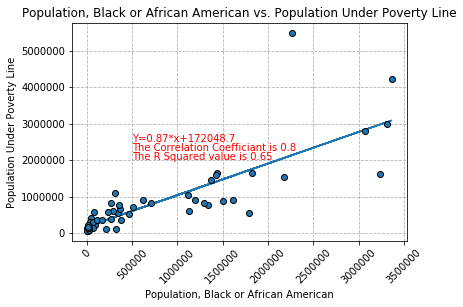

In [102]:
#get correlation between population and poverty
correlation=sts.pearsonr(merge_nototal_df['Population Black'],merge_nototal_df['Poverty'])
#Regression of poverty
slope,intercept,rvalue,pvalue,stderr=sts.linregress(merge_nototal_df['Population Black'],merge_nototal_df['Poverty'])
trendline=slope*merge_nototal_df['Population Black']+intercept

#scatter plot of black populationa and poverty
plt.scatter(merge_nototal_df['Population Black'],merge_nototal_df['Poverty'],edgecolors="black",zorder=3)
plt.plot(merge_nototal_df['Population Black'],trendline)
plt.annotate(f"Y={round(slope,2)}*x+{round(intercept,2)}",(500000,2500000),color="red")
plt.annotate(f"The Correlation Coefficiant is {round(correlation[0],2)}",(500000,2250000),color="red")
plt.annotate(f"The R Squared value is {round(rvalue**2,2)}",(500000,2000000),color="red")
plt.title("Population, Black or African American vs. Population Under Poverty Line")
plt.xlabel("Population, Black or African American")
plt.ylabel("Population Under Poverty Line")
plt.xticks(rotation=45)

plt.grid(linestyle="dashed", zorder=0)
plt.savefig("Outputs/PovertyVsPop.png", bbox_inches="tight")
plt.show()

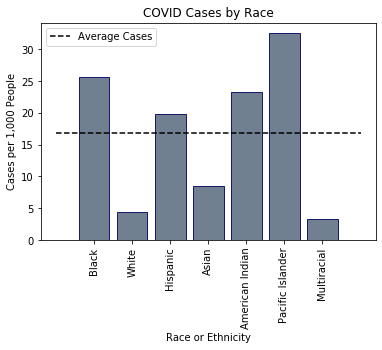

In [103]:
#set up lists for plots 
xlabels=['Black', 'White', 'Hispanic', 'Asian', 'American Indian', 'Pacific Islander', 'Multiracial']
cases_race=[black_cases, white_cases, latinX_cases, asian_cases, AIAN_cases, NHPI_cases, multirace_cases]
deaths_race=[black_deaths, white_deaths, latinX_deaths, asian_deaths, AIAN_deaths, NHPI_deaths, multirace_deaths]

#calculate average number of cases across all races
average_cases= np.mean(cases_race)

#plot bar graph cases by race
x_axis = np.arange(len(xlabels))
plt.bar(x_axis, cases_race , align="center", color = 'slategrey', edgecolor='midnightblue')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xlabels, rotation=90)
plt.plot([-1, 7], [average_cases, average_cases], 'k--', label='Average Cases')
plt.legend()
plt.title("COVID Cases by Race")
plt.xlabel("Race or Ethnicity")
plt.ylabel("Cases per 1,000 People")
plt.savefig("Outputs/CasesByRace.png", bbox_inches="tight")
plt.show()

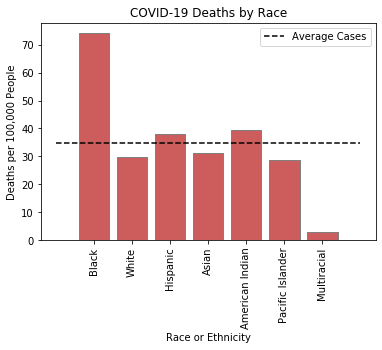

In [104]:
#calculate average number of cases across all races
average_cases= np.mean(deaths_race)

#plot bar graph cases by race
x_axis = np.arange(len(xlabels))
plt.bar(x_axis, deaths_race , align="center", color = 'indianred', edgecolor='grey')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xlabels, rotation=90)
plt.plot([-1, 7], [average_cases, average_cases], 'k--', label='Average Cases')
plt.legend()
plt.title("COVID-19 Deaths by Race")
plt.xlabel("Race or Ethnicity")
plt.ylabel("Deaths per 100,000 People")
plt.savefig("Outputs/DeathsByRace.png", bbox_inches="tight")
plt.show()